## Probabilistic bits

We start with a short introduction to the probabilistic bits to trace the details of the game below.

Suppose that we have a biased coin landing on heads with probability $ 0.3 $, and it is tossed once but we do not see the outcome.

Even though it lands on either heads or tails, our information about the outcome is probabilistic: It is heads with probability $ 0.3 $ and tails with probablity $ 0.7 $. 

If we consider this coin as a system with two states (heads and tails: respectively, states 0 and 1), then we can say that after one iteration it is in states 0 and 1 with probabilities 0.3 and 0.7, respectively.

In general, a probabilistic bit is in states 0 and 1 with probabilities $ p $ and $ 1-p $, where $ p $ is a number between 0 and 1. Remark that if $  p=1 $ or $ p=0 $, then the bit becomes deterministic (which is not a coin at all its just same face always). 

If the above biased coin is tossed once more, the probabilisties of the getting heads and tails (or being in the states in 0 and 1) will still be the same. In the following game, by using two biased-coins, we will be able to have different probabilities for the states 0 and 1. This game is our first step to define a probabilitic operator for probabilistic bits.

## The game

Our friend Asja has one euro and one cent. 

Both coins are biased, and the probabilities of getting heads and tails are as follows:
<ul>
    <li> one euro: heads with probability $ 0.6 $ and tails with probability $ 0.4 $. </li>
    <li> one cent: heads with probability $ 0.3 $ and tails with probability $ 0.7 $. </li>
</ul>

Asja flips her coins based on the following <b>protocol</b>: 
<ol> 
    <li> she starts with flipping one euro[*]; </li>
    <li> whenever she gets heads, she flips one euro in the next round; and, </li>
    <li> whenever she gets tails, she flips one cent in the next round. </li>
</ol>

By using a single bit, we summarize all transitions of this game as follows:

$
GameCoins = \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & 0.6 & 0.3\\  \mathbf{Tail} & 0.4 & 0.7  \end{array} = \begin{array}{c|cc} \hookleftarrow & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 0.6 & 0.3 \\  \mathbf{1} & 0.4 & 0.7  \end{array}
$

[*] We should fix an initial condition. Otherwise, Asja cannot pick any of the coins at the beginning of game.


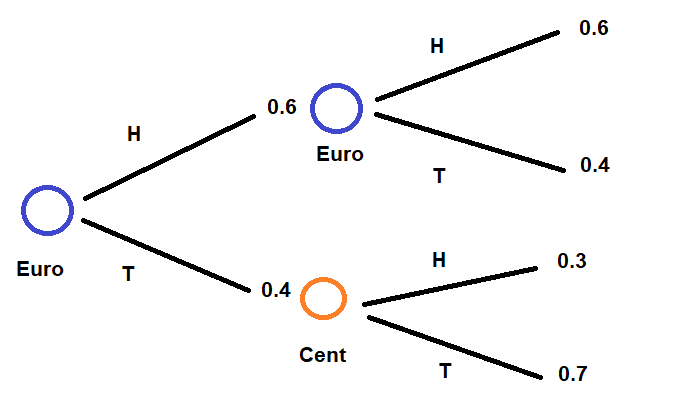

<h3>Task 1: Convince yourself </h3>

Convince yourself about the correctness of transitions given in the table.

<i> Remark that there is no difference between getting heads from the one euro coin or from the one cent coin.
    
Therefore, one bit is enough to represent all transitions.
</i>

<h3> Tracing Asja's three coin tosses </h3>

Suppose that Asja <b>secretly</b> tosses her coins based on the defined protocol.

By using python, we can calculate the probabilities of Asja seeing heads and tails after three coin tosses.

<i><b>Remark:</b> In the previous tasks of [Coin Flipping](B06_Coin_Flip.ipynb), we know the ideal ratios, and we experiment many coin tosses and then expect to observe the results close to the ideal ratios.
    
Here we calculate the exact probabilities (the ideal ratio) by using python. (We will not do the experiments as in the previous tasks.)
</i>

We present our solution step by step.

In [1]:
#
# OUR SOLUTION
#

# initial condition:
# Asja will start with one euro,
#    and so, we assume that the probability of having head is 1 at the beginning.
prob_head = 1
prob_tail = 0


#
# first coin-flip
#

# the new probability of head is calculated by using the first row of table
new_prob_head = prob_head * 0.6 + prob_tail * 0.3

# the new probability of tail is calculated by using the second row of the table
new_prob_tail = prob_head * 0.4 + prob_tail * 0.7

# update the probabilities for the second round
prob_head = new_prob_head
prob_tail = new_prob_tail

#
# second coin-flip
#
# we do the same calculations

new_prob_head = prob_head * 0.6 + prob_tail * 0.3
new_prob_tail = prob_head * 0.4 + prob_tail * 0.7

prob_head = new_prob_head
prob_tail = new_prob_tail

#
# third coin-flip
#
# we do the same calculations

new_prob_head = prob_head * 0.6 + prob_tail * 0.3
new_prob_tail = prob_head * 0.4 + prob_tail * 0.7

prob_head = new_prob_head
prob_tail = new_prob_tail

# print prob_head and prob_tail
print("the probability of getting head after 3 coin tosses is",prob_head)
print("the probability of getting tail after 3 coin tosses is",prob_tail)

the probability of getting head after 3 coin tosses is 0.44399999999999995
the probability of getting tail after 3 coin tosses is 0.556


<h3> Task 2: Tracing ten biased coin tosses </h3>

By using python, calculate the probabilities of Asja seeing heads and tails after 10 coin tosses.

$
GameCoins = \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & 0.6 & 0.3\\  \mathbf{Tail} & 0.4 & 0.7  \end{array} = \begin{array}{c|cc} \hookleftarrow & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 0.6 & 0.3 \\  \mathbf{1} & 0.4 & 0.7  \end{array}
$

Use a loop in your solution.

In [6]:
import numpy as np 

biased_op = np.array([[0.6,0.3],[0.4,0.7]])
state = np.array([[1],[0]])

for i in range(10):
    state = np.matmul(biased_op,state)

print(state)

[[0.4285748]
 [0.5714252]]


<a href="CS12_Coin_Flip_Game_Solutions.ipynb#task2">click for our solution</a>

<h3> Task 3</h3>

Repeat Task 2 for 20, 30, and 50 coin tosses.

In [24]:
import numpy as np 

biased_op = np.array([[0.6,0.3],[0.4,0.7]])
state = np.array([[1],[0]])

iterations = [20,30,50]
result = []

for it in iterations:
    state = np.array([[1],[0]])
    for i in range(it):
        state = np.matmul(biased_op,state)
    result.append(state)
    
for it in range(len(iterations)):
    print("Iterations=",iterations[it]," Resultant state=\n",result[it])


Iterations= 20  Resultant state=
 [[0.42857143]
 [0.57142857]]
Iterations= 30  Resultant state=
 [[0.42857143]
 [0.57142857]]
Iterations= 50  Resultant state=
 [[0.42857143]
 [0.57142857]]


<a href="CS12_Coin_Flip_Game_Solutions.ipynb#task3">click for our solution</a>

<h3> Task 4</h3>

Repeat Task 2 for 10, 20, and 50 coin tosses by picking different initial conditions, e.g., 
    
    prob_head = prob_tail = 1/2
or
    
    prob_head = 0 
    prob_tail = 1

In [25]:
import numpy as np 

biased_op = np.array([[0.6,0.3],[0.4,0.7]])
state = np.array([[1],[0]])

iterations = [20,30,50]
result = []

for it in iterations:
    state = np.array([[0],[1]])
    for i in range(it):
        state = np.matmul(biased_op,state)
    result.append(state)
    
for it in range(len(iterations)):
    print("Iterations=",iterations[it]," Resultant state=\n",result[it])

Iterations= 20  Resultant state=
 [[0.42857143]
 [0.57142857]]
Iterations= 30  Resultant state=
 [[0.42857143]
 [0.57142857]]
Iterations= 50  Resultant state=
 [[0.42857143]
 [0.57142857]]


<a href="CS12_Coin_Flip_Game_Solutions.ipynb#task4">click for our solution</a>

<hr>

<h3> Extra: Arbitrary transitions for GameCoins</h3>

By changing the bias of each Asja's coin, we can define arbitrary GameCoins.

If $ a $ is the probability of getting heads for one euro and $ b $ is the probability of getting heads for one cent, then we have the following transitions:

$
GameCoins(a,b) = \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & a & b\\  \mathbf{Tail} & 1-a & 1-b  \end{array} = \begin{array}{c|cc} \hookleftarrow & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & a & b \\  \mathbf{1} & 1-a & 1-b  \end{array}
$

<h3> Task 5 </h3>

Observe that if $ a=1 $ and $ b = 0 $, then it is Identity operator, i.e., the initial condition will stay as it is.

If $ a=0 $ and $ b=1 $, then it is NOT operator. NOT operator swaps the probabilities of heads and tails in each step. If the initial probabilities are not $ 0.5 $ and $ 0.5 $, then the system never converges to a fixed probabilities.

In [1]:
import numpy as np 

def GameCoins(a,b):
    
    if(a+b!=1):
        return np.array([[1,0],[0,1]]) # identity 
    else:
        return np.array([[a,b],[1-a,1-b]])


In [3]:
state = np.array([[1],[0]]) # Head 
print("Starting with head")
for i in range(10):
    operator_id = GameCoins(1,0) # identity 
    state = np.matmul(operator_id,state) 
    print("Result after Identity Toss=",i,": Head:Tail = ",state[0][0],":",state[1][0])

Starting with head
Result after Identity Toss= 0 : Head:Tail =  1 : 0
Result after Identity Toss= 1 : Head:Tail =  1 : 0
Result after Identity Toss= 2 : Head:Tail =  1 : 0
Result after Identity Toss= 3 : Head:Tail =  1 : 0
Result after Identity Toss= 4 : Head:Tail =  1 : 0
Result after Identity Toss= 5 : Head:Tail =  1 : 0
Result after Identity Toss= 6 : Head:Tail =  1 : 0
Result after Identity Toss= 7 : Head:Tail =  1 : 0
Result after Identity Toss= 8 : Head:Tail =  1 : 0
Result after Identity Toss= 9 : Head:Tail =  1 : 0


In [4]:
state = np.array([[1],[0]]) # Head    
print("Starting with head")
for i in range(10):
    operator_not = GameCoins(0,1) # NOT 
    state = np.matmul(operator_not,state) 
    print("Result after Identity Toss=",i,": Head:Tail = ",state[0][0],":",state[1][0])

Starting with head
Result after Identity Toss= 0 : Head:Tail =  0 : 1
Result after Identity Toss= 1 : Head:Tail =  1 : 0
Result after Identity Toss= 2 : Head:Tail =  0 : 1
Result after Identity Toss= 3 : Head:Tail =  1 : 0
Result after Identity Toss= 4 : Head:Tail =  0 : 1
Result after Identity Toss= 5 : Head:Tail =  1 : 0
Result after Identity Toss= 6 : Head:Tail =  0 : 1
Result after Identity Toss= 7 : Head:Tail =  1 : 0
Result after Identity Toss= 8 : Head:Tail =  0 : 1
Result after Identity Toss= 9 : Head:Tail =  1 : 0


In [5]:
state = np.array([[1],[0]]) # Head    
print("Starting with head")
for i in range(10):
    operator_fair = GameCoins(0.5,0.5) # Fair 
    state = np.matmul(operator_fair,state) 
    print("Result after Identity Toss=",i,": Head:Tail = ",state[0][0],":",state[1][0])


Starting with head
Result after Identity Toss= 0 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 1 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 2 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 3 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 4 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 5 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 6 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 7 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 8 : Head:Tail =  0.5 : 0.5
Result after Identity Toss= 9 : Head:Tail =  0.5 : 0.5


<h3> Task 6</h3>

Randomly pick the values of $ a $ and $ b $, and then implement Tasks 3 and 4 for $ GameCoins(a,b) $.

In [21]:
import numpy as np 

def GameCoins2(a,b):
    return np.array([[a,b],[1-a,1-b]])


a = np.round(np.random.rand(1)[0],1)
b = np.round(np.random.rand(1)[0],1)

#print("a=",a," b=",b)
#print()
#print("1-a=",1-a," 1-b=",1-b)
#print()

biased_op = GameCoins2(a,b)
state = np.array([[1],[0]]) # Head  


In [22]:

print("Initial state is head")
print("Biased operator is\n",biased_op)

iterations = [1,2,8,16,32,64,100,1000]
result = []

for it in iterations:
    state = np.array([[0],[1]])
    for i in range(it):
        state = np.matmul(biased_op,state)
    result.append(state)
    
for it in range(len(iterations)):
    print("Result after Biased Tossese=",iterations[it],": \tHead:Tail = \t",result[it][0][0],"\t:\t",result[it][1][0])



Initial state is head
Biased operator is
 [[0.3 0.6]
 [0.7 0.4]]
Result after Biased Tossese= 1 : 	Head:Tail = 	 0.6 	:	 0.4
Result after Biased Tossese= 2 : 	Head:Tail = 	 0.42 	:	 0.58
Result after Biased Tossese= 8 : 	Head:Tail = 	 0.4615081799999999 	:	 0.5384918199999998
Result after Biased Tossese= 16 : 	Head:Tail = 	 0.46153845955168954 	:	 0.53846154044831
Result after Biased Tossese= 32 : 	Head:Tail = 	 0.46153846153846123 	:	 0.5384615384615381
Result after Biased Tossese= 64 : 	Head:Tail = 	 0.46153846153846123 	:	 0.5384615384615381
Result after Biased Tossese= 100 : 	Head:Tail = 	 0.46153846153846123 	:	 0.5384615384615381
Result after Biased Tossese= 1000 : 	Head:Tail = 	 0.46153846153846123 	:	 0.5384615384615381


<h3> Task 7</h3>

10 times repeat Task 6 and observe whether the probabilities converge in each time.

In [36]:
import numpy as np 

def GameCoins2(a,b):
    return np.array([[a,b],[1-a,1-b]])


a = np.random.rand(1)[0]
b = np.random.rand(1)[0]

print("a=",a," b=",b)
print()
print("1-a=",1-a," 1-b=",1-b)
print()

biased_op = GameCoins2(a,b)
state = np.array([[1],[0]]) # Head  

print(biased_op)
print()

iterations = [1,10,100,1000,10000]
result = []

for it in iterations:
    state = np.array([[0],[1]])
    for i in range(it):
        state = np.matmul(biased_op,state)
    result.append(state)
    
for it in range(len(iterations)):
    print("Iterations=",iterations[it]," Resultant state=\n",result[it])



a= 0.6768629400313702  b= 0.39908911158863514

1-a= 0.32313705996862985  1-b= 0.6009108884113649

[[0.67686294 0.39908911]
 [0.32313706 0.60091089]]

Iterations= 1  Resultant state=
 [[0.39908911]
 [0.60091089]]
Iterations= 10  Resultant state=
 [[0.55258039]
 [0.44741961]]
Iterations= 100  Resultant state=
 [[0.5525819]
 [0.4474181]]
Iterations= 1000  Resultant state=
 [[0.5525819]
 [0.4474181]]
Iterations= 10000  Resultant state=
 [[0.5525819]
 [0.4474181]]


<h3>Task 8</h3>

We can rewrite arbitrary GameCoins as 

$  \begin{array}{c|cc} \hookleftarrow & \mathbf{Head} & \mathbf{Tail} \\ \hline \mathbf{Head} & 1-y & x\\  \mathbf{Tail} & y & 1-x  \end{array} = \begin{array}{c|cc} \hookleftarrow & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 1-y & x \\  \mathbf{1} & y & 1-x  \end{array}.
$ 

We assume that it is neither Identity nor NOT operator. Then, independent of the initial state, the system always converges to 

$ Pr[\mbox{"heads"}] = \dfrac{x}{x+y} $ and $ Pr[\mbox{"tails"}]=\dfrac{y}{x+y} $, 

which are the probabilities of getting heads and tails, respectively.

Observe this fact by checking the results of Task 7.

In [44]:
# Verification:

print(biased_op)
print()



print(np.round(result[-1], 3)) 
print()

pr_heads = biased_op[0][1] / (biased_op[0][1]+biased_op[1][0])
pr_heads = np.round(pr_heads,3)
print(pr_heads)

pr_tails = biased_op[1][0] / (biased_op[0][1]+biased_op[1][0])
pr_tails = np.round(pr_tails,3)
print(pr_tails)

print("Is Pr_heads verified:",pr_heads==np.round(result[-1][0],3) )
print("Is Pr_tails verified:",pr_tails==np.round(result[-1][1],3) )

[[0.67686294 0.39908911]
 [0.32313706 0.60091089]]

[[0.553]
 [0.447]]

0.553
0.447
Is Pr_heads verified: [ True]
Is Pr_tails verified: [ True]


In [23]:
import numpy as np 

def GameCoins2(a,b):
    return np.array([[a,b],[1-a,1-b]])


a = np.round(np.random.rand(1)[0],1)
b = np.round(np.random.rand(1)[0],1)

#print("a=",a," b=",b)
#print()
#print("1-a=",1-a," 1-b=",1-b)
#print()

biased_op = GameCoins2(a,b)
state = np.array([[1],[0]]) # Head  



actual_p_head = biased_op[0][1] / (biased_op[0][1] + biased_op[1][0])
actual_p_tail = biased_op[1][0] / (biased_op[0][1] + biased_op[1][0])

In [25]:
print("Initial state is head")
print("Biased operator is\n",biased_op)

iterations = [1,2,8,16,32,64,100,1000]
result = []

for it in iterations:
    state = np.array([[0],[1]])
    for i in range(it):
        state = np.matmul(biased_op,state)
    result.append(state)
    
for it in range(len(iterations)):
    print("Result after Biased Tossese=",iterations[it],": \tHead:Tail = \t",result[it][0][0],"\t:\t",result[it][1][0])

    
print("Actual P(H): ",actual_p_head)
print("Actual P(H): ",actual_p_tail)

print("Compare and see...")

Initial state is head
Biased operator is
 [[0.9 0.3]
 [0.1 0.7]]
Result after Biased Tossese= 1 : 	Head:Tail = 	 0.3 	:	 0.7
Result after Biased Tossese= 2 : 	Head:Tail = 	 0.48 	:	 0.5199999999999999
Result after Biased Tossese= 8 : 	Head:Tail = 	 0.73740288 	:	 0.2625971199999999
Result after Biased Tossese= 16 : 	Head:Tail = 	 0.7497884167569407 	:	 0.25021158324305914
Result after Biased Tossese= 32 : 	Head:Tail = 	 0.7499999403100416 	:	 0.25000005968995825
Result after Biased Tossese= 64 : 	Head:Tail = 	 0.7499999999999948 	:	 0.25000000000000455
Result after Biased Tossese= 100 : 	Head:Tail = 	 0.7499999999999993 	:	 0.24999999999999975
Result after Biased Tossese= 1000 : 	Head:Tail = 	 0.7499999999999993 	:	 0.24999999999999975
Actual P(H):  0.75
Actual P(H):  0.24999999999999997
Compare and see...
